In [1]:
#needs version >= 1.5 for full functionality
import tequila as tq

In [2]:
#Initialize molecule
import tequila as tq
geomstring="C 0.0 0.0 0.0\nH 0.0 0.0 1.085\nH 0.0 0.0 -1.085\nCl 1.767 0.0 0.0\nCl 0.0 1.767 0.0"
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ")
print(molecule)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : cc-pVDZ         
geometry        : C 0.0 0.0 0.0
H 0.0 0.0 1.085
H 0.0 0.0 -1.085
Cl 1.767 0.0 0.0
Cl 0.0 1.767 0.0 
description     :                 
multiplicity    : 1               
charge          : 0               
name            : cl2ch2          
frozen_core     : True            
n_qubits        : 98              
reference state : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Basis

IntegralManager:
ActiveSpace:
Active Space Data:
active_orbitals : [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49

In [3]:
#Molecular Orbitals and Point Groups
molecule.orbitals[3]

OrbitalData(irrep='B2', idx_irrep=1, idx_total=14, idx=3, energy=-0.766729743955345, occ=None, pair=None)

In [4]:
#Since the Hamiltonian of CH2Cl2 is already very large, let's Set Active Space
import tequila as tq
import numpy
active_orbitals = {"A1":[0,1,2], "A2":[0,1,2]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 27 terms
-956.7926+0.1727Z(0)-0.0041Y(0)Z(1)Y(2)-0.0041X(0)Z(1)X(2)+0.1727Z(1)-0.0041Y(1)Z(2)Y(3)-0.0041X(1)Z(2)X(3)-0.3124Z(2)-0.3124Z(3)+0.0912Z(0)Z(1)-0.0153Y(0)Y(2)-0.0153X(0)X(2)-0.0153Z(0)Y(1)Z(2)Y(3)-0.0153Z(0)X(1)Z(2)X(3)+0.0108Y(0)X(1)X(2)Y(3)-0.0108Y(0)Y(1)X(2)X(3)-0.0108X(0)X(1)Y(2)Y(3)+0.0108X(0)Y(1)Y(2)X(3)+0.0684Z(0)Z(2)+0.0793Z(0)Z(3)-0.0112Y(0)Z(1)Y(2)Z(3)-0.0112X(0)Z(1)X(2)Z(3)+0.0793Z(1)Z(2)-0.0112Y(1)Y(3)-0.0112X(1)X(3)+0.0684Z(1)Z(3)+0.0733Z(2)Z(3)
[-957.89482471 -957.43904689 -957.43904689 -957.12233625 -957.12233625
 -956.97883952 -956.97883952 -956.97883952 -956.89261171 -956.61190534
 -956.42547789 -956.42547789 -956.1837198  -956.1837198  -956.05343662
 -955.9518647 ]
lowest energy =  -957.8948247116153


In [5]:
#Setting different active space
import tequila as tq
import numpy
active_orbitals = {"A1":[0,1], "A2":[0,1], "B1":[0]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 4 terms
-957.3441+0.3205Z(0)+0.3205Z(1)+0.0912Z(0)Z(1)
[-957.89385437 -957.43533328 -957.43533328 -956.61190534]
lowest energy =  -957.8938543744019


In [6]:
#Setting different active space
import tequila as tq
import numpy
active_orbitals = {"A1":[0,1], "A2":[0,1], "B1":[0], "B2":[1]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 15 terms
-956.1879+0.6399Z(0)+0.6399Z(1)+0.4533Z(2)+0.4533Z(3)+0.1237Z(0)Z(1)+0.0059Y(0)X(1)X(2)Y(3)-0.0059Y(0)Y(1)X(2)X(3)-0.0059X(0)X(1)Y(2)Y(3)+0.0059X(0)Y(1)Y(2)X(3)+0.0635Z(0)Z(2)+0.0694Z(0)Z(3)+0.0694Z(1)Z(2)+0.0635Z(1)Z(3)+0.0912Z(2)Z(3)
[-957.89385437 -957.43533328 -957.43533328 -957.12704119 -957.12704119
 -956.61265266 -956.41463565 -956.41463565 -956.41463565 -956.36737734
 -955.86478382 -955.31369411 -955.31369411 -954.87561199 -954.87561199
 -953.52078601]
lowest energy =  -957.8938543744016


In [7]:
#Setting different active space
import tequila as tq
import numpy
active_orbitals = {"A1":[0,1,2], "A2":[0,1,2], "B1":[0], "B2":[0,1]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 62 terms
-955.8891+0.5136Z(0)+0.5136Z(1)+0.3056Z(2)-0.0186Y(2)Z(3)Y(4)-0.0186X(2)Z(3)X(4)+0.3056Z(3)-0.0186Y(3)Z(4)Y(5)-0.0186X(3)Z(4)X(5)-0.1860Z(4)-0.1860Z(5)+0.1237Z(0)Z(1)+0.0059Y(0)X(1)X(2)Y(3)-0.0059Y(0)Y(1)X(2)X(3)-0.0059X(0)X(1)Y(2)Y(3)+0.0059X(0)Y(1)Y(2)X(3)-0.0011Y(0)X(1)X(3)Y(4)-0.0011Y(0)Y(1)Y(3)Y(4)-0.0011X(0)X(1)X(3)X(4)-0.0011X(0)Y(1)Y(3)X(4)+0.0011Y(0)X(1)X(2)Z(3)Z(4)Y(5)-0.0011Y(0)Y(1)X(2)Z(3)Z(4)X(5)-0.0011X(0)X(1)Y(2)Z(3)Z(4)Y(5)+0.0011X(0)Y(1)Y(2)Z(3)Z(4)X(5)+0.0014Y(0)X(1)X(4)Y(5)-0.0014Y(0)Y(1)X(4)X(5)-0.0014X(0)X(1)Y(4)Y(5)+0.0014X(0)Y(1)Y(4)X(5)+0.0635Z(0)Z(2)-0.0067Z(0)Y(2)Z(3)Y(4)-0.0067Z(0)X(2)Z(3)X(4)+0.0694Z(0)Z(3)-0.0078Z(0)Y(3)Z(4)Y(5)-0.0078Z(0)X(3)Z(4)X(5)+0.0624Z(0)Z(4)+0.0639Z(0)Z(5)+0.0694Z(1)Z(2)-0.0078Z(1)Y(2)Z(3)Y(4)-0.0078Z(1)X(2)Z(3)X(4)+0.0635Z(1)Z(3)-0.0067Z(1)Y(3)Z(4)Y(5)-0.0067Z(1)X(3)Z(4)X(5)+0.0639Z(1)Z(4)+0.0624Z(1)Z(5)+0.0912Z(2)Z(3)-0.0153Y(2)Y(4)-0.0153X(2)X(4)-0.0153Z(2)Y(3)Z(4)Y(5)-0.0153Z(2)X(3)Z(4)X(5)+0.0108Y(2)X(3

In [10]:
#Setting larger active space
import tequila as tq
import numpy
active_orbitals = {"A1":[0,1,2,3], "A2":[0,1,2,3], "B1":[0,1], "B2":[0,2]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 193 terms
-955.7188+0.1555Z(0)+0.0004Y(0)Z(1)Z(2)Z(3)Y(4)+0.0004X(0)Z(1)Z(2)Z(3)X(4)-0.0021Y(0)Z(1)Z(2)Z(3)Z(4)Z(5)Y(6)-0.0021X(0)Z(1)Z(2)Z(3)Z(4)Z(5)X(6)+0.1555Z(1)+0.0004Y(1)Z(2)Z(3)Z(4)Y(5)+0.0004X(1)Z(2)Z(3)Z(4)X(5)-0.0021Y(1)Z(2)Z(3)Z(4)Z(5)Z(6)Y(7)-0.0021X(1)Z(2)Z(3)Z(4)Z(5)Z(6)X(7)+0.1441Z(2)+0.1441Z(3)-0.3111Z(4)-0.0030Y(4)Z(5)Y(6)-0.0030X(4)Z(5)X(6)-0.3111Z(5)-0.0030Y(5)Z(6)Y(7)-0.0030X(5)Z(6)X(7)-0.3227Z(6)-0.3227Z(7)+0.0912Z(0)Z(1)-0.0153Y(0)Z(2)Z(3)Y(4)-0.0153X(0)Z(2)Z(3)X(4)+0.0017Y(0)Z(2)Z(3)Z(4)Z(5)Y(6)+0.0017X(0)Z(2)Z(3)Z(4)Z(5)X(6)+0.0358Y(0)X(1)X(2)Y(3)-0.0358Y(0)Y(1)X(2)X(3)-0.0358X(0)X(1)Y(2)Y(3)+0.0358X(0)Y(1)Y(2)X(3)-0.0153Z(0)Y(1)Z(2)Z(3)Z(4)Y(5)-0.0153Z(0)X(1)Z(2)Z(3)Z(4)X(5)+0.0108Y(0)X(1)X(4)Y(5)-0.0108Y(0)Y(1)X(4)X(5)-0.0108X(0)X(1)Y(4)Y(5)+0.0108X(0)Y(1)Y(4)X(5)-0.0004Y(0)X(1)X(5)Y(6)-0.0004Y(0)Y(1)Y(5)Y(6)-0.0004X(0)X(1)X(5)X(6)-0.0004X(0)Y(1)Y(5)X(6)+0.0017Z(0)Y(1)Z(2)Z(3)Z(4)Z(5)Z(6)Y(7)+0.0017Z(0)X(1)Z(2)Z(3)Z(4)Z(5)Z(6)X(7)+0.0004Y(0)X(1

In [12]:
#Setting even larger active space
import tequila as tq
import numpy
active_orbitals = {"A1":[0,1,2,3,4], "A2":[0,1,2,3], "B1":[0,1], "B2":[0,2]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 193 terms
-955.7188+0.1555Z(0)+0.0004Y(0)Z(1)Z(2)Z(3)Y(4)+0.0004X(0)Z(1)Z(2)Z(3)X(4)-0.0021Y(0)Z(1)Z(2)Z(3)Z(4)Z(5)Y(6)-0.0021X(0)Z(1)Z(2)Z(3)Z(4)Z(5)X(6)+0.1555Z(1)+0.0004Y(1)Z(2)Z(3)Z(4)Y(5)+0.0004X(1)Z(2)Z(3)Z(4)X(5)-0.0021Y(1)Z(2)Z(3)Z(4)Z(5)Z(6)Y(7)-0.0021X(1)Z(2)Z(3)Z(4)Z(5)Z(6)X(7)+0.1441Z(2)+0.1441Z(3)-0.3111Z(4)-0.0030Y(4)Z(5)Y(6)-0.0030X(4)Z(5)X(6)-0.3111Z(5)-0.0030Y(5)Z(6)Y(7)-0.0030X(5)Z(6)X(7)-0.3227Z(6)-0.3227Z(7)+0.0912Z(0)Z(1)-0.0153Y(0)Z(2)Z(3)Y(4)-0.0153X(0)Z(2)Z(3)X(4)+0.0017Y(0)Z(2)Z(3)Z(4)Z(5)Y(6)+0.0017X(0)Z(2)Z(3)Z(4)Z(5)X(6)+0.0358Y(0)X(1)X(2)Y(3)-0.0358Y(0)Y(1)X(2)X(3)-0.0358X(0)X(1)Y(2)Y(3)+0.0358X(0)Y(1)Y(2)X(3)-0.0153Z(0)Y(1)Z(2)Z(3)Z(4)Y(5)-0.0153Z(0)X(1)Z(2)Z(3)Z(4)X(5)+0.0108Y(0)X(1)X(4)Y(5)-0.0108Y(0)Y(1)X(4)X(5)-0.0108X(0)X(1)Y(4)Y(5)+0.0108X(0)Y(1)Y(4)X(5)-0.0004Y(0)X(1)X(5)Y(6)-0.0004Y(0)Y(1)Y(5)Y(6)-0.0004X(0)X(1)X(5)X(6)-0.0004X(0)Y(1)Y(5)X(6)+0.0017Z(0)Y(1)Z(2)Z(3)Z(4)Z(5)Z(6)Y(7)+0.0017Z(0)X(1)Z(2)Z(3)Z(4)Z(5)Z(6)X(7)+0.0004Y(0)X(1

In [13]:
#Excited state calculations with VQE
import tequila as tq
geomstring="C 0.0 0.0 0.0\nH 0.0 0.0 {R}\nH 0.0 0.0 -{R}\nCl 1.767 0.0 0.0\nCl 0.0 1.767 0.0"
fci_gs = []
fci_es = []
energies_gs = []
energies_es = []
P0 = tq.paulis.Projector("|00>")
for R in [0.2 + 0.1*i for i in range(25)]:
    print("Optimizing point R={:2.1f}".format(R))
    active = {"A1":[0,1,2], "A2":[0,1,2]}
    mol = tq.chemistry.Molecule(geometry=geomstring.format(R=R), basis_set="cc-pVDZ", active_orbitals=active)
    H = mol.make_hamiltonian()
    results = []
    for i in range(2):
        # labeling ensures that tequila can distinguish the variables
        # singles can break the symmetry here falling into different states than the two above
        # (i.e. the open-shell singly excited manifold: in jordan_wigner those states are build from
        #  |1001> and |0110>)
        U = mol.make_upccgsd_ansatz(name="2-UpCCGD", label=i) 
        E = tq.ExpectationValue(U, H)
        active_vars = E.extract_variables()
        angles = {angle: 0.0 for angle in active_vars}
        for data, U2 in results:
            S2 = tq.ExpectationValue(H=P0, U=U + U2.dagger())
            E -= data.energy * S2
            angles = {**angles, **data.angles}
        print("Starting to optimize state ", i)
        result = tq.optimizer_scipy.minimize(E, silent=True, method="bfgs", variables=active_vars, initial_values=angles)
        print("finished with energy {:2.8f}".format(result.energy))
        results.append((result, U))
    energies_gs.append(results[0][0].energy)
    energies_es.append(results[1][0].energy)

Optimizing point R=0.2
Starting to optimize state  0
finished with energy -943.54483662
Starting to optimize state  1
finished with energy -941.60168457
Optimizing point R=0.3
Starting to optimize state  0
finished with energy -951.03866669
Starting to optimize state  1
finished with energy -949.10015869
Optimizing point R=0.4
Starting to optimize state  0
finished with energy -954.31506993
Starting to optimize state  1
finished with energy -952.37622070
Optimizing point R=0.5
Starting to optimize state  0
finished with energy -956.01202548
Starting to optimize state  1
finished with energy -954.07025146
Optimizing point R=0.6
Starting to optimize state  0
finished with energy -956.93163428
Starting to optimize state  1
finished with energy -954.98889160
Optimizing point R=0.7
Starting to optimize state  0
finished with energy -957.43251102
Starting to optimize state  1
finished with energy -955.48992920
Optimizing point R=0.8
Starting to optimize state  0
finished with energy -957.698

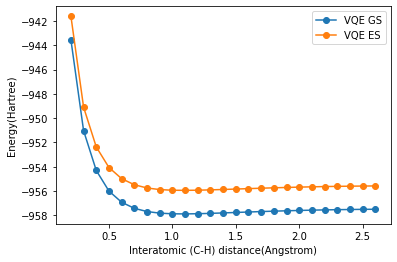

In [20]:
import matplotlib.pyplot as plt
R =  [0.2 + 0.1*i for i in range(len(energies_gs))]
plt.figure()
plt.plot(R, energies_gs, marker="o", label="VQE GS")
plt.plot(R, energies_es, marker="o", label="VQE ES")
plt.xlabel('Interatomic (C-H) distance(Angstrom)')
plt.ylabel('Energy(Hartree)')
plt.legend()
plt.show()

In [17]:
#Excited state calculations with VQE with different active space
import tequila as tq
geomstring="C 0.0 0.0 0.0\nH 0.0 0.0 {R}\nH 0.0 0.0 -{R}\nCl 1.767 0.0 0.0\nCl 0.0 1.767 0.0"
fci_gs = []
fci_es = []
energies_gs = []
energies_es = []
P0 = tq.paulis.Projector("|00>")
for R in [0.2 + 0.1*i for i in range(25)]:
    print("Optimizing point R={:2.1f}".format(R))
    active = {"A1":[0,1,2], "A2":[0,1,2], "B1":[0,2]}
    mol = tq.chemistry.Molecule(geometry=geomstring.format(R=R), basis_set="cc-pVDZ", active_orbitals=active)
    H = mol.make_hamiltonian()
    results = []
    for i in range(2):
        # labeling ensures that tequila can distinguish the variables
        # singles can break the symmetry here falling into different states than the two above
        # (i.e. the open-shell singly excited manifold: in jordan_wigner those states are build from
        #  |1001> and |0110>)
        U = mol.make_upccgsd_ansatz(name="2-UpCCGD", label=i) 
        E = tq.ExpectationValue(U, H)
        active_vars = E.extract_variables()
        angles = {angle: 0.0 for angle in active_vars}
        for data, U2 in results:
            S2 = tq.ExpectationValue(H=P0, U=U + U2.dagger())
            E -= data.energy * S2
            angles = {**angles, **data.angles}
        print("Starting to optimize state ", i)
        result = tq.optimizer_scipy.minimize(E, silent=True, method="bfgs", variables=active_vars, initial_values=angles)
        print("finished with energy {:2.8f}".format(result.energy))
        results.append((result, U))
    energies_gs.append(results[0][0].energy)
    energies_es.append(results[1][0].energy)

Optimizing point R=0.2
Starting to optimize state  0
finished with energy -943.54483662
Starting to optimize state  1
finished with energy -941.60168457
Optimizing point R=0.3
Starting to optimize state  0
finished with energy -951.03866669
Starting to optimize state  1
finished with energy -949.10015869
Optimizing point R=0.4
Starting to optimize state  0
finished with energy -954.31506993
Starting to optimize state  1
finished with energy -952.37622070
Optimizing point R=0.5
Starting to optimize state  0
finished with energy -956.01202548
Starting to optimize state  1
finished with energy -954.07025146
Optimizing point R=0.6
Starting to optimize state  0
finished with energy -956.93163428
Starting to optimize state  1
finished with energy -954.98889160
Optimizing point R=0.7
Starting to optimize state  0
finished with energy -957.43251102
Starting to optimize state  1
finished with energy -955.48992920
Optimizing point R=0.8
Starting to optimize state  0
finished with energy -957.698

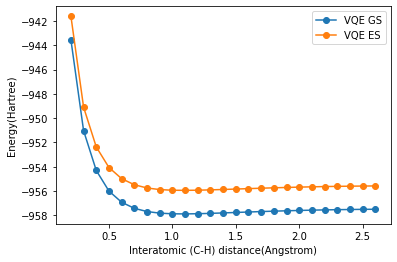

In [19]:
import matplotlib.pyplot as plt
R =  [0.2 + 0.1*i for i in range(len(energies_gs))]
plt.figure()
plt.plot(R, energies_gs, marker="o", label="VQE GS")
plt.plot(R, energies_es, marker="o", label="VQE ES")
plt.xlabel('Interatomic (C-H) distance(Angstrom)')
plt.ylabel('Energy(Hartree)')
plt.legend()
plt.show()